In [2]:
from sklearn.datasets import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_iris()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [5]:
X = df.loc[:, df.columns != 'target']

In [6]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y = df['target']

In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
df.duplicated().sum()

1

<h3>We observe here that one duplicate value is present but we will keep it for EDA.</h3>

<h1>Data Visualization</h1>

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<h3>First let us see the distribution of all the features</h3>

In [16]:
def density_plot(axes, data, name):
    sns.kdeplot(ax = axes, data = data)
    axes.set_title(f'{name} Density Plot', fontsize = 20)
    axes.set_xlabel(xlabel = name, fontsize = 18)
    axes.set_ylabel(ylabel = 'Density', fontsize = 18)

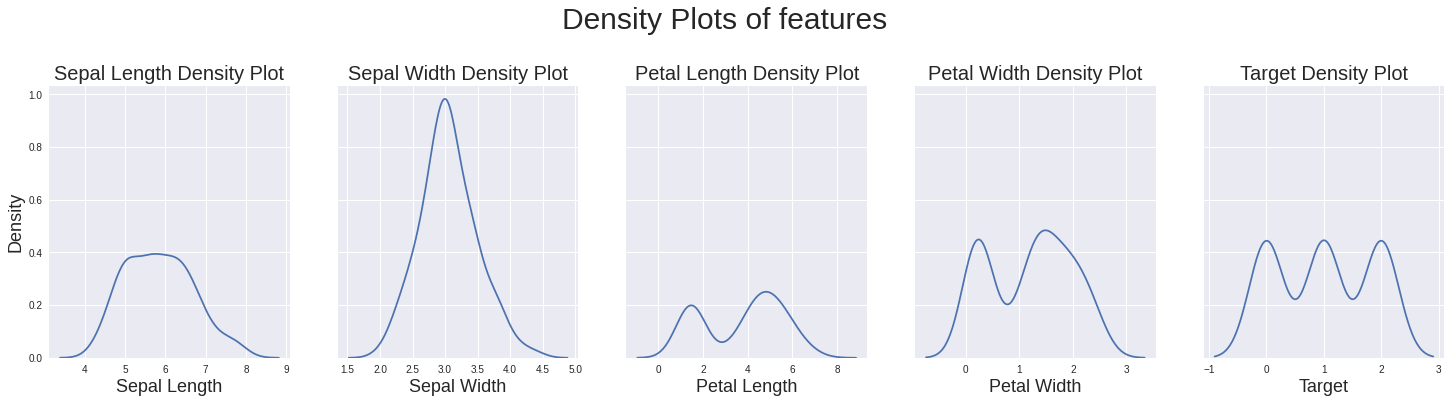

In [17]:
fig, axes = plt.subplots(1,5, figsize = (25,5), sharey = True)
fig.suptitle('Density Plots of features', fontsize = 30, y = 1.1)
density_plot(axes[0], df['sepal length (cm)'], 'Sepal Length')
density_plot(axes[1], df['sepal width (cm)'], 'Sepal Width')
density_plot(axes[2], df['petal length (cm)'], 'Petal Length')
density_plot(axes[3], df['petal width (cm)'], 'Petal Width')
density_plot(axes[4], df['target'], 'Target')

<h2>Inferences:</h2><h3>From these KDE plots we can infer a few things:<br></h3>
- Sepal Length and Sepal Width are almost normal<br>
- Petal Length and Petal Width are bimodal<br>
- The target feature is trimodal with data almost equally distributed<br>

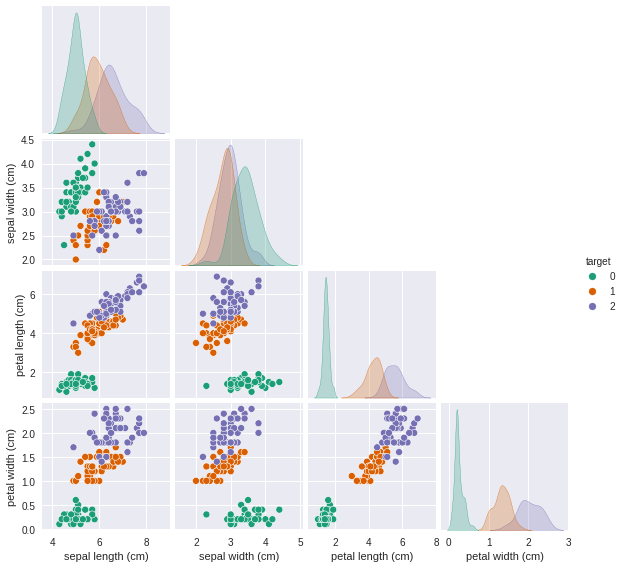

In [18]:
sns.pairplot(df, hue = 'target', corner = True, palette = 'Dark2', height = 2)
plt.show()

<h3>From this pairplot we can find a few inferences:</h3><br>
- Target 0 species has smaller sepal length but a bigger sepal width.<br>
- Target 1 species and Target 2 species almost have balanced sepal widths and lengths. But Target 2 species have a little larger sepal length than the sepal width.<br>
- Target 0 has a very smaller petal width and length when compared with Target 1 and 2 species.<br>
- Target 1 species have a balanced petal width and length.<br>
- Target 2 species have a bigger petal width and lengths.<br>

In [19]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

<h3>Earlier we saw that we had a duplicate value. Without dropping it, the data is perfectly balanced. To not imbalance the data, let us proceed with the duplicate value. </h3>

<h3>Let us see the correlation between the features</h3>

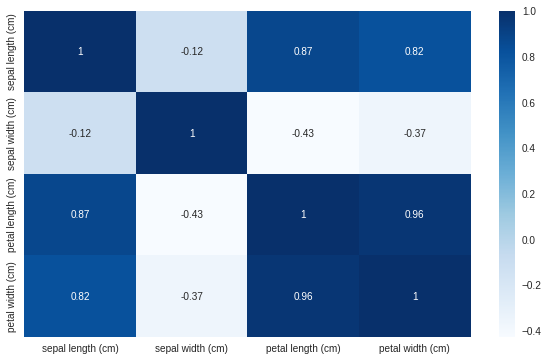

In [21]:
plt.figure(figsize = (10,6))
sns.heatmap(X.corr(), cmap = 'Blues', annot = True)
plt.show()

<h3>Inference:</h3><br>
- From this we can see that<br>
&emsp;&emsp;- Petal length and Sepal length have a high correlation<br>
&emsp;&emsp;- Petal length and Sepal width have a high correlation<br>
&emsp;&emsp;- Petal length and Petal width have a high correlation<br>

<h3>Boxplots</h3>

In [22]:
def box_plot(axes, ycol, ylabel, xlabel, data):
    sns.boxplot(y = ycol ,x = 'target',ax = axes, data = data, orient = 'v')
    axes.set_title(f'{ylabel} Box Plot', fontsize = 20)
    axes.set_xlabel(xlabel = xlabel, fontsize = 15)
    axes.set_ylabel(ylabel = ylabel, fontsize = 15)

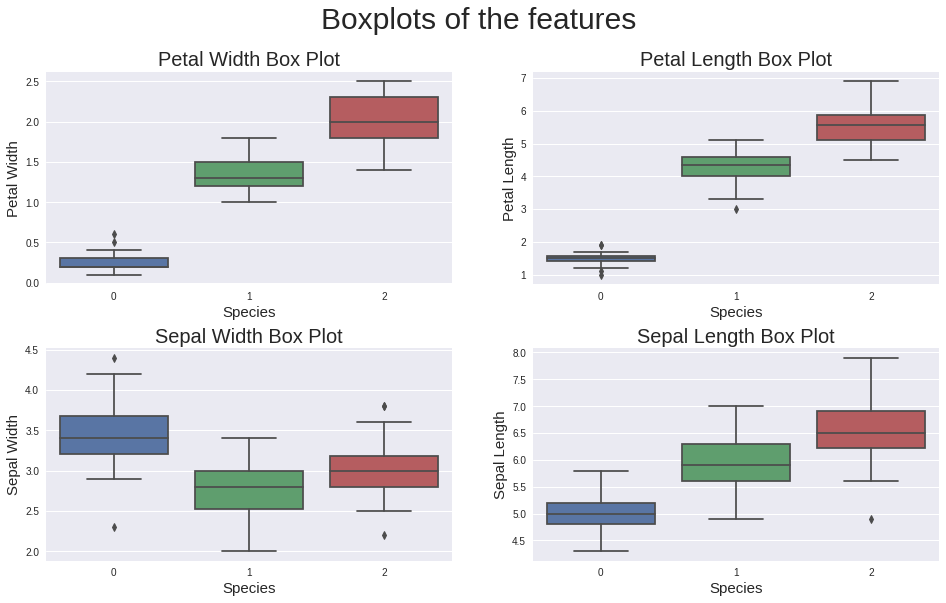

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
fig.suptitle('Boxplots of the features', fontsize = 30)
box_plot(axes[0,0],'petal width (cm)' ,'Petal Width', 'Species', df)
box_plot(axes[0,1],'petal length (cm)' ,'Petal Length', 'Species', df)
box_plot(axes[1,0],'sepal width (cm)' ,'Sepal Width', 'Species', df)
box_plot(axes[1,1],'sepal length (cm)' ,'Sepal Length', 'Species', df)
plt.subplots_adjust(hspace = .3)
plt.show()

<h3>Inferences:</h3><br>
- Target 0 species usually have a smaller petal sizes with a few outliers.<br> 
- Target 1 species have average petal and sepal sizes<br>
- Target 2 species have the longest and widest petal and sepal sizes.<br>

<h3>From this complete EDA we can make a few final observations</h3>

- The features of this dataset are balanced.
- We have four numerical features out of which there is a very strong positive correlation between the petal width and petal length.
- The target 0 species is easily distinguishable because of its small size.

<h1>Feature Selection</h1>

In [24]:
from sklearn.decomposition import PCA

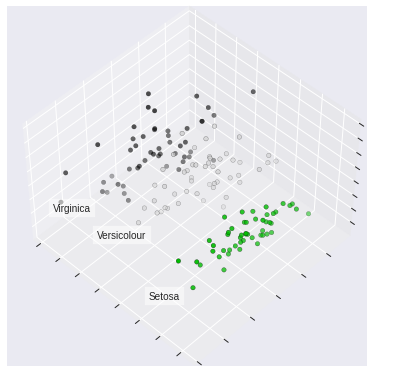

In [25]:
fig = plt.figure(1, figsize=(8, 5))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
pca = PCA(n_components = 3)
pca.fit(X)
Xt = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(Xt[y == label, 0].mean(),Xt[y == label, 1].mean() + 1.5,Xt[y == label, 2].mean(),name,horizontalalignment="center",bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),)
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [26]:
#pca.components_
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

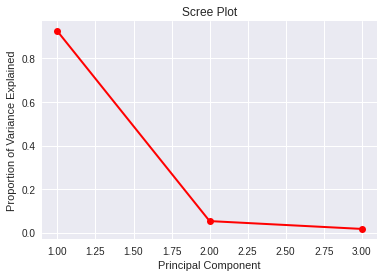

In [27]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<h3>From this screeplot we can see that PC1 and PC2 are almost accounting for more than 92% variance of the total data</h3>

<h1>Feature Scaling</h1>

In [28]:
from sklearn.preprocessing import MinMaxScaler

ss_iris = MinMaxScaler()
ss_iris.fit(X_train)
X_train_std = ss_iris.transform(X_train)
X_test_std = ss_iris.transform(X_test)

In [29]:
Xtrain = pd.DataFrame(X_train_std, columns = X_train.columns)
Xtest = pd.DataFrame(X_test_std, columns = X_test.columns)

<h1>Modeling</h1>

In [30]:
# Logistic Regression, Naive Bayes, KNN

In [31]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.inspection import DecisionBoundaryDisplay

In [32]:
def accuracy(preds):
    print("Precision: ", precision_score(y_test, preds, average = 'macro'))
    print("Recall: ", recall_score(y_test, preds, average = 'macro'))
    print("F1 Score: ", f1_score(y_test, preds, average = 'macro'))
    return
    
def plotcm(model, preds):
    plt.figure(figsize = (6,6))
    confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)
    plt.show()

<h2>Logistic Regression</h2>

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(Xtrain,y_train)

LogisticRegression()

In [34]:
preds = logreg.predict(Xtest)
acc = logreg.score(Xtest, y_test)
print("Accuracy: ", acc)
accuracy(preds)

Accuracy:  0.9666666666666667
Precision:  0.9333333333333332
Recall:  0.9722222222222222
F1 Score:  0.9484702093397747


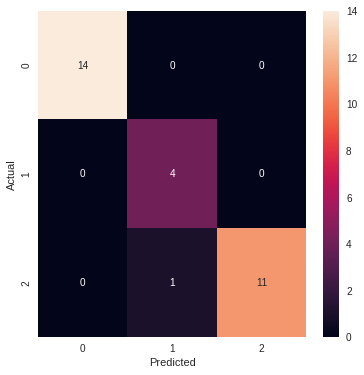

In [35]:
plotcm(logreg, preds)

<h2>Naive Bayes</h2>

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nbc = nb.fit(Xtrain, y_train)

In [37]:
preds = nbc.predict(Xtest)
acc = nbc.score(Xtest, y_test)
print("Accuracy: ", acc)
accuracy(preds)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


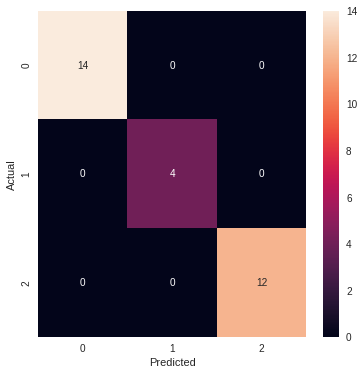

In [38]:
plotcm(nbc, preds)

<h2>KNN without PCA</h2>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(Xtrain, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
preds = knn.predict(Xtest)
acc = knn.score(Xtest, y_test)
print("Accuracy: ", acc)
accuracy(preds)

Accuracy:  0.9666666666666667
Precision:  0.9333333333333332
Recall:  0.9722222222222222
F1 Score:  0.9484702093397747


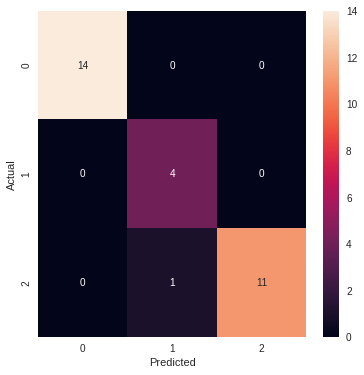

In [41]:
plotcm(knn, preds)

<h2>KNN with PCA</h2>

In [42]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461872, 0.05306648, 0.01710261])

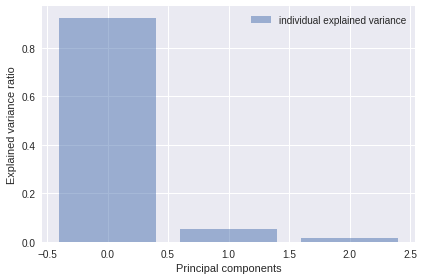

In [43]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(3), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [50]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(Xt, y, test_size = 0.3, stratify=y)

In [51]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_new, y_train_new)
preds = knn.predict(X_test_new)
acc = knn.score(X_test_new, y_test_new)
print("Accuracy: ", acc)
print("Precision: ", precision_score(y_test_new, preds, average = 'macro'))
print("Recall: ", recall_score(y_test_new, preds, average = 'macro'))
print("F1 Score: ", f1_score(y_test_new, preds, average = 'macro'))

Accuracy:  0.9777777777777777
Precision:  0.9791666666666666
Recall:  0.9777777777777779
F1 Score:  0.9777530589543938


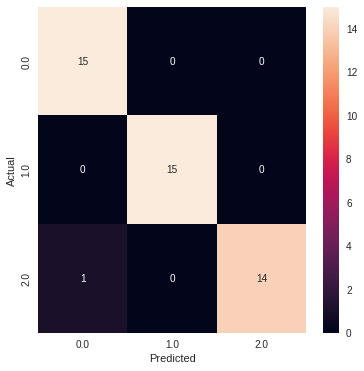

In [52]:
plt.figure(figsize = (6,6))
confusion_matrix = pd.crosstab(y_test_new, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()